<a href="https://colab.research.google.com/github/DerekMooreJr2002/Data-Science/blob/main/Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests #this denotes a request to gather data from an outisde source and insert it here in the notebook.
from pdf2image import convert_from_path
import matplotlib.pyplot as plt #this tells the notebook that you want to take information and make it into a plot or graph of some sort.
import numpy as np #numpy or np denotes that you want to add an array with the data.
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
url = "https://docs.google.com/presentation/d/19mtDHSfZNLV8f6jKwVKgE8h9XocoP1J7qsepH4oRblo/edit#slide=id.g1b5fb47a55b_0_398" #url command allows you to imput a URL in which the data will be pulled from.

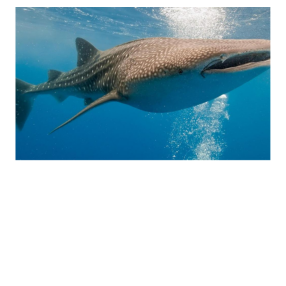

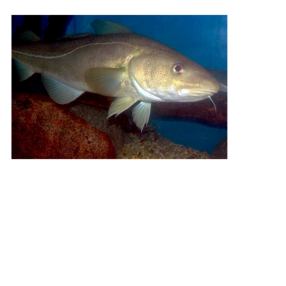

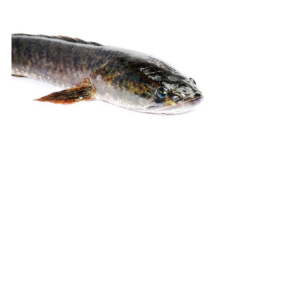

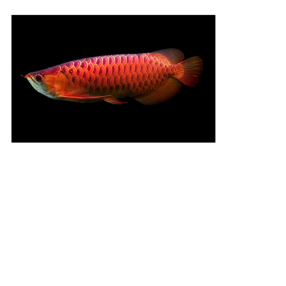

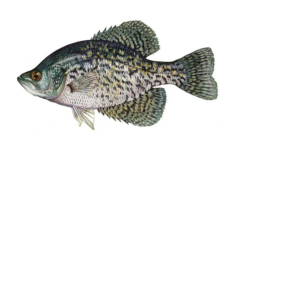

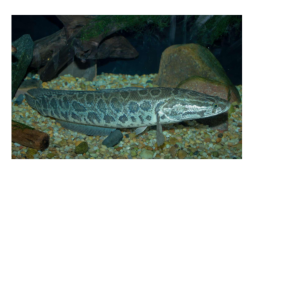

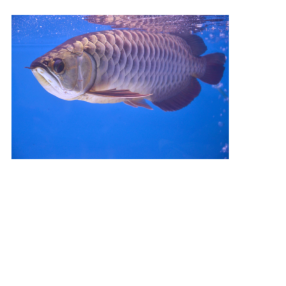

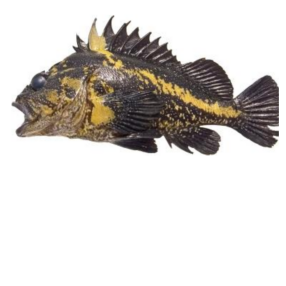

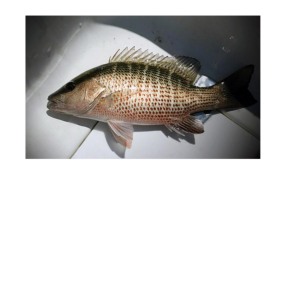

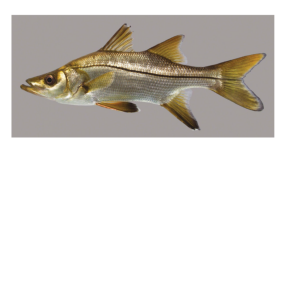

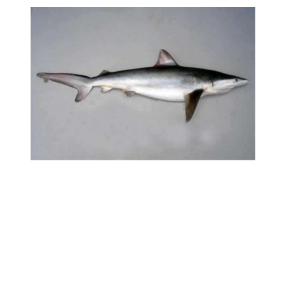

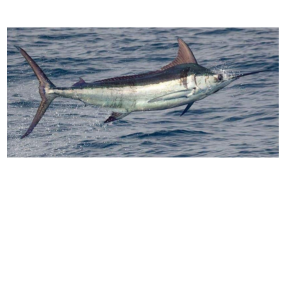

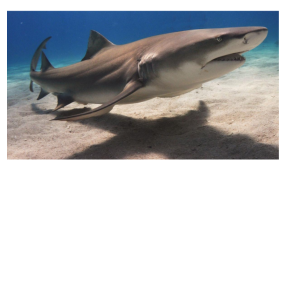

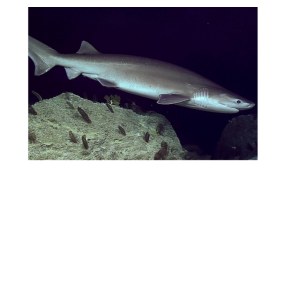

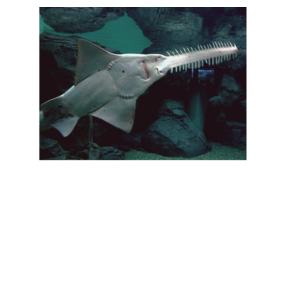

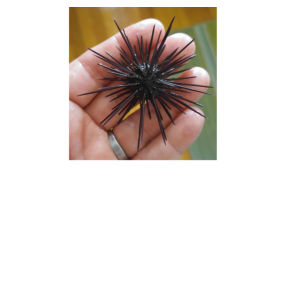

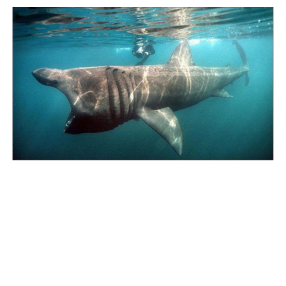

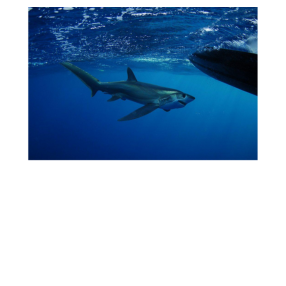

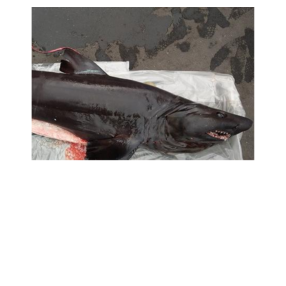

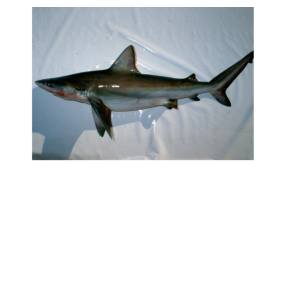

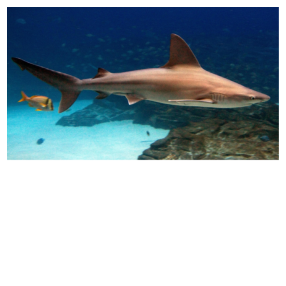

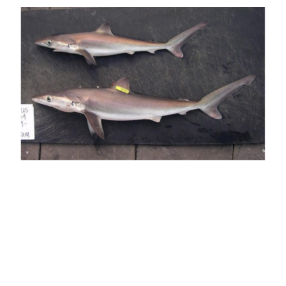

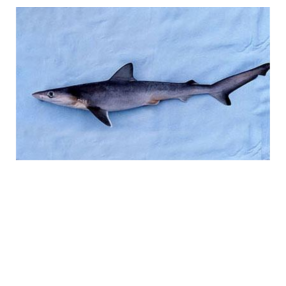

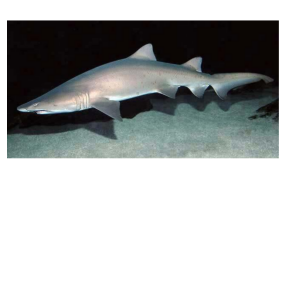

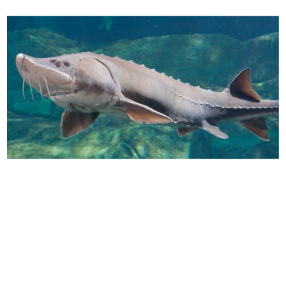

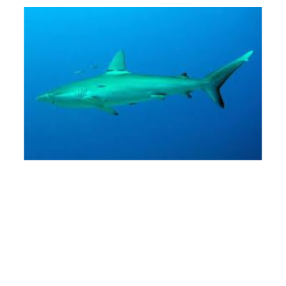

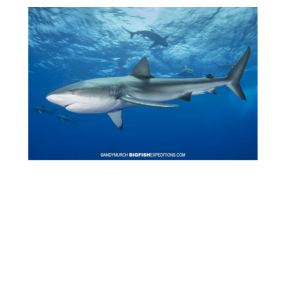

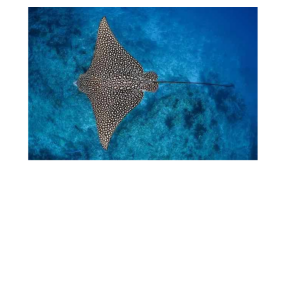

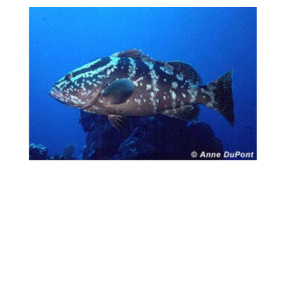

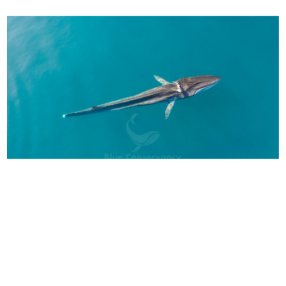

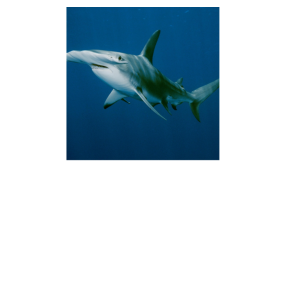

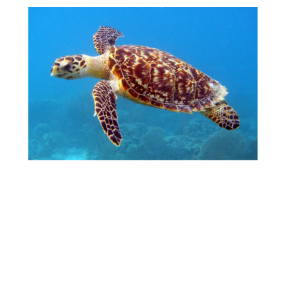

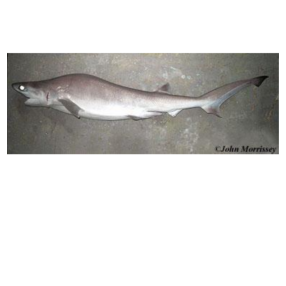

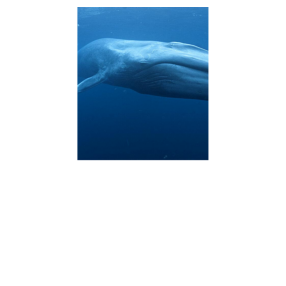

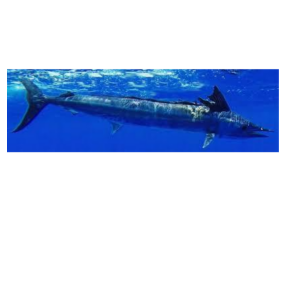

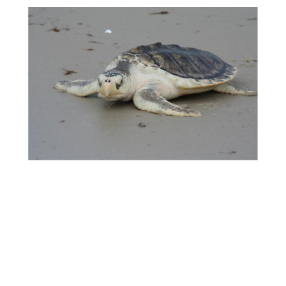

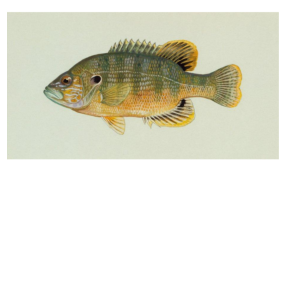

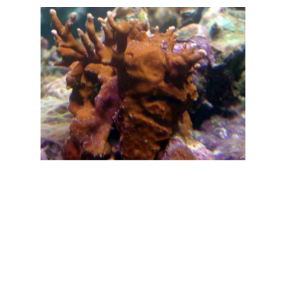

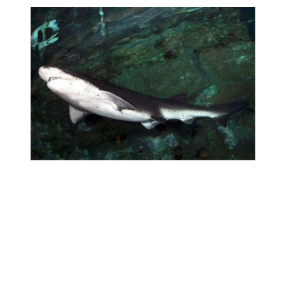

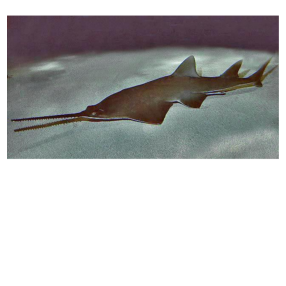

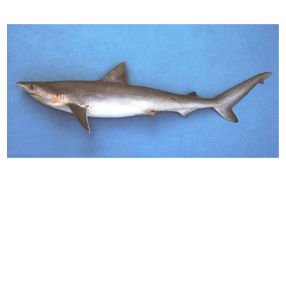

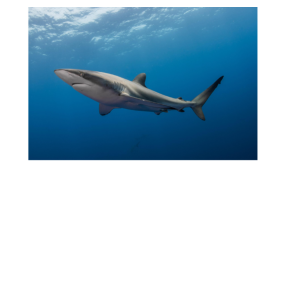

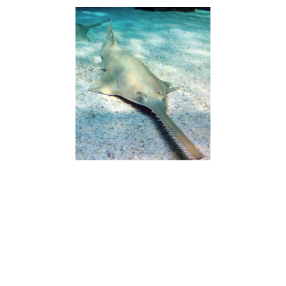

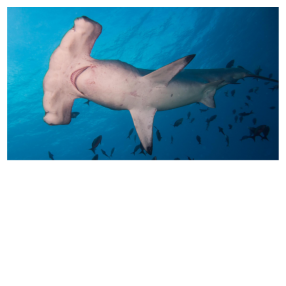

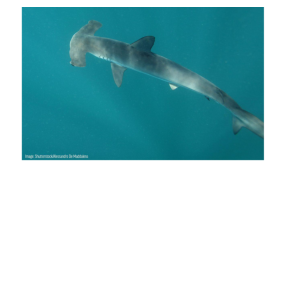

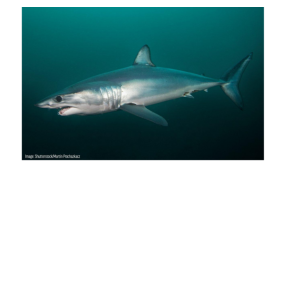

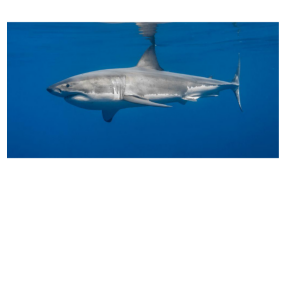

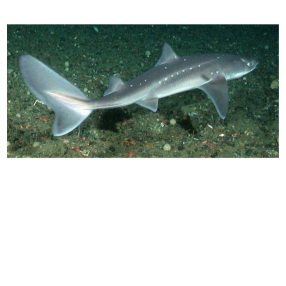

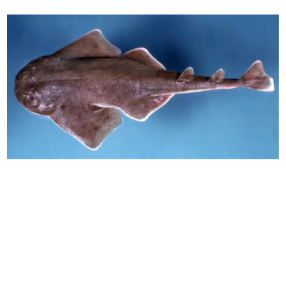

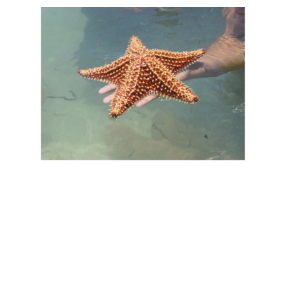

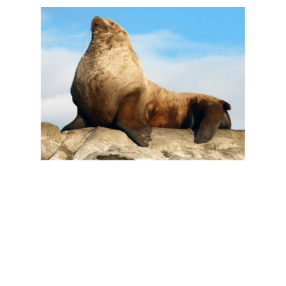

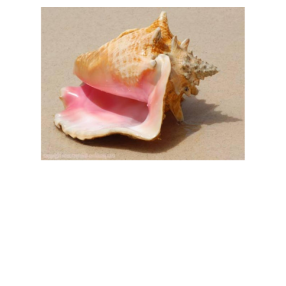

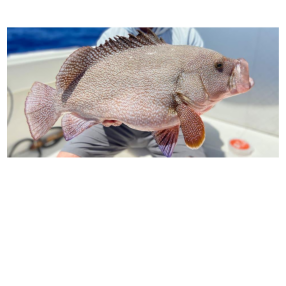

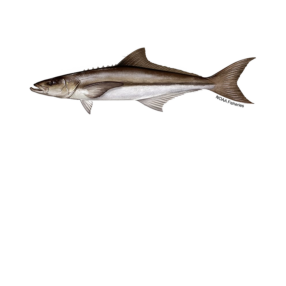

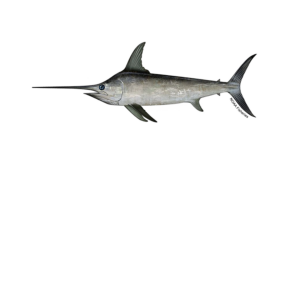

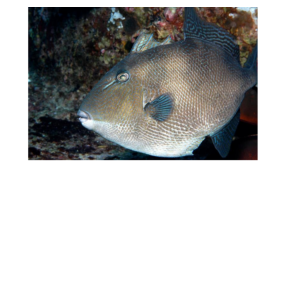

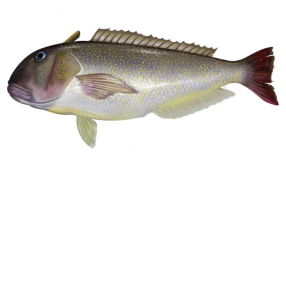

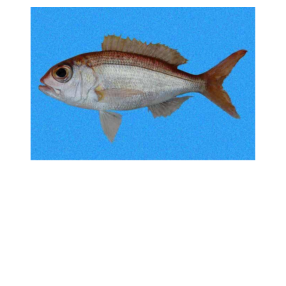

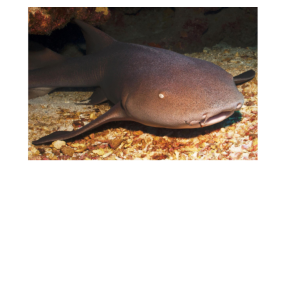

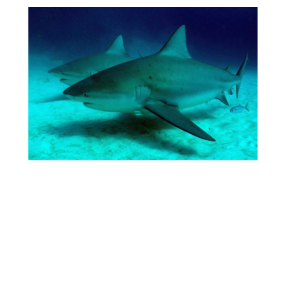

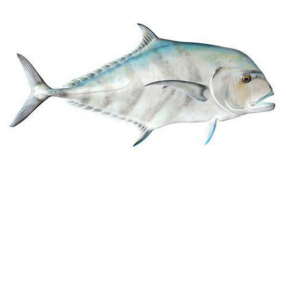

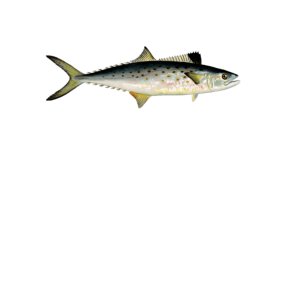

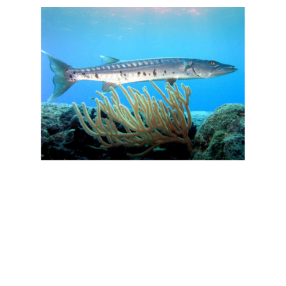

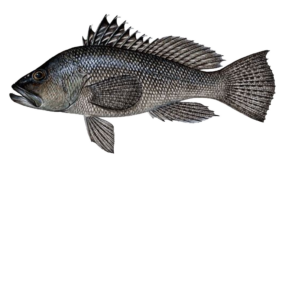

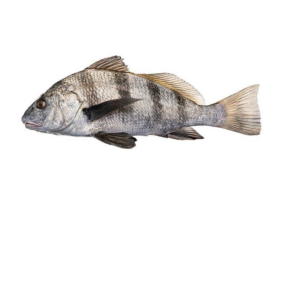

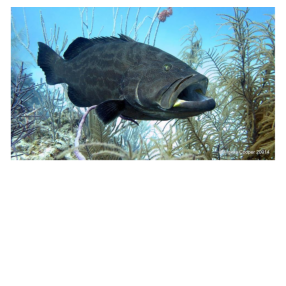

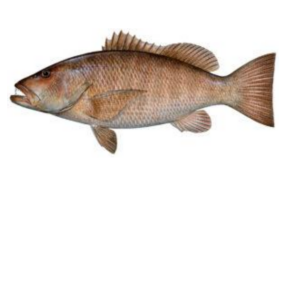

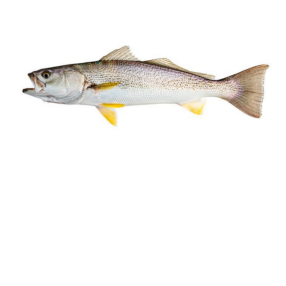

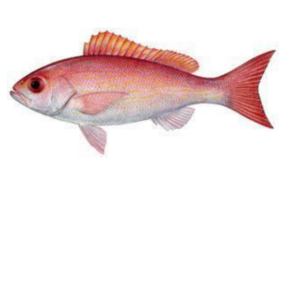

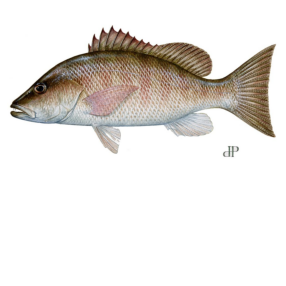

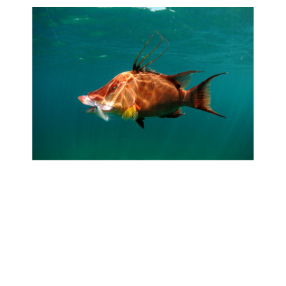

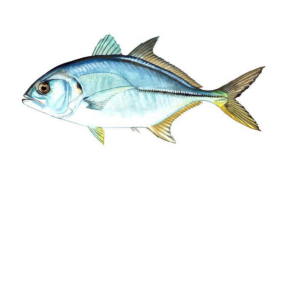

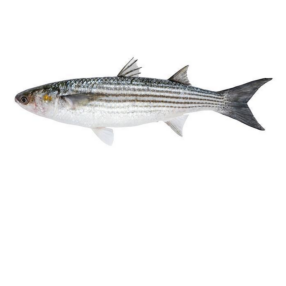

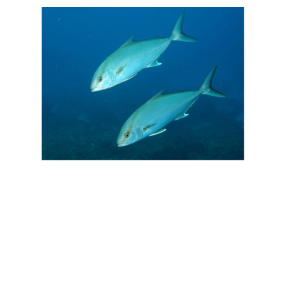

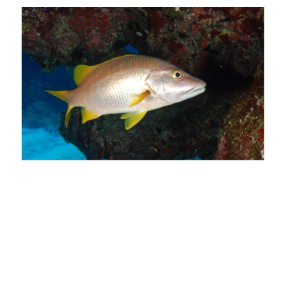

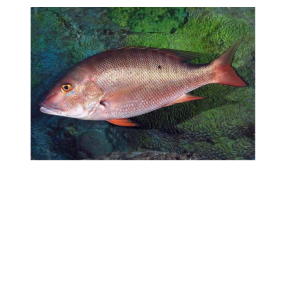

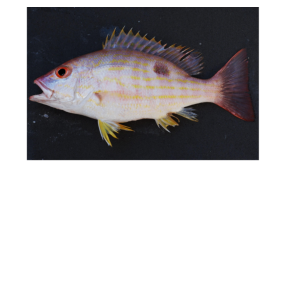

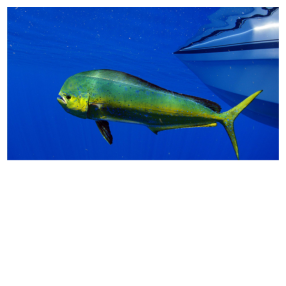

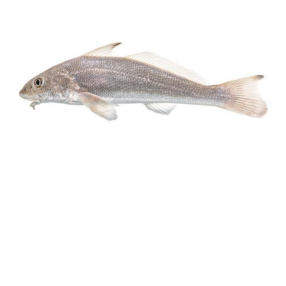

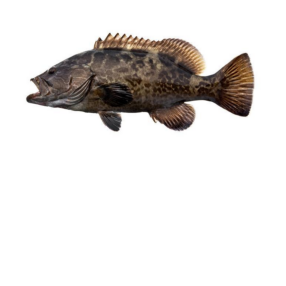

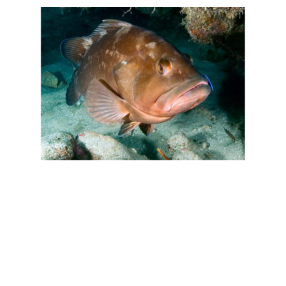

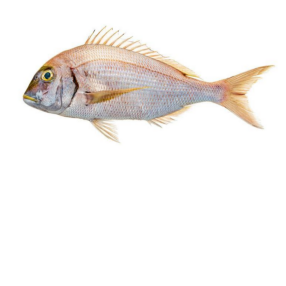

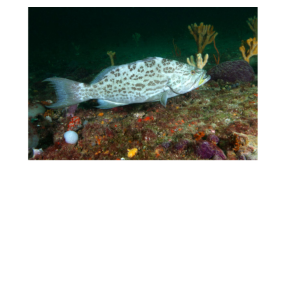

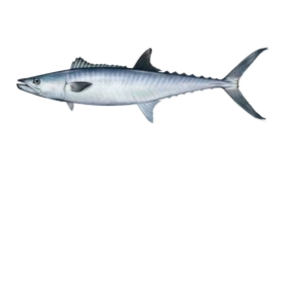

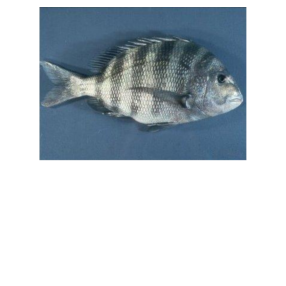

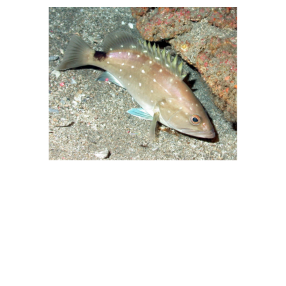

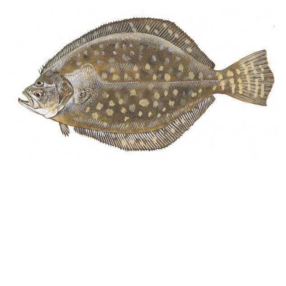

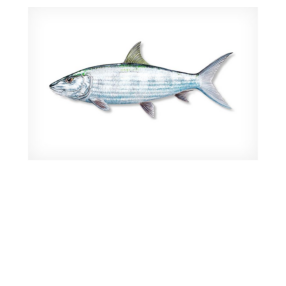

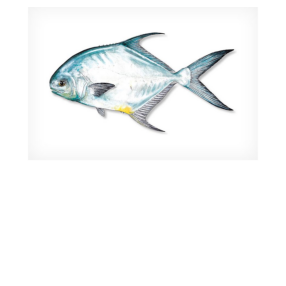

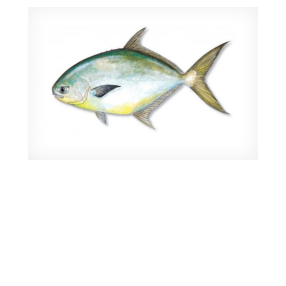

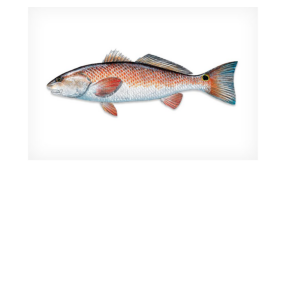

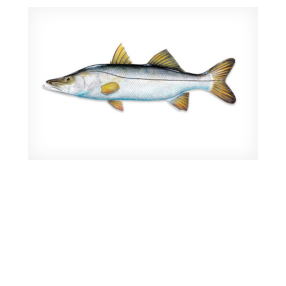

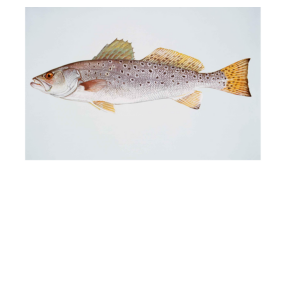

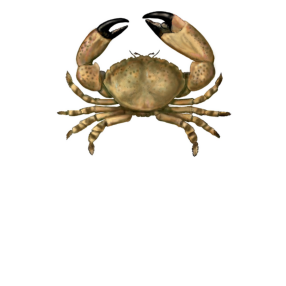

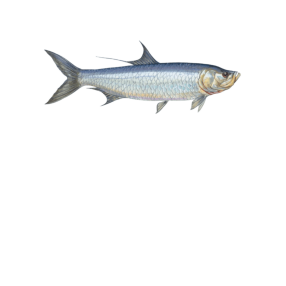

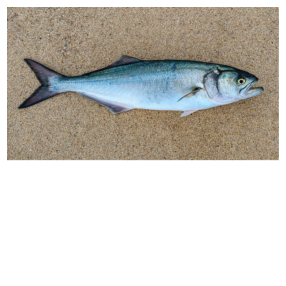

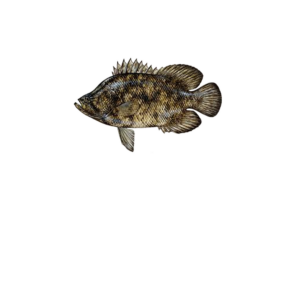

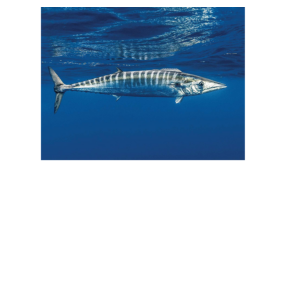

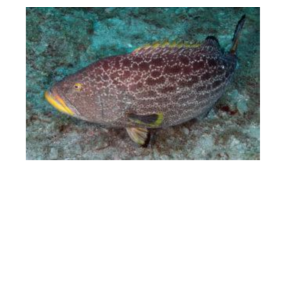

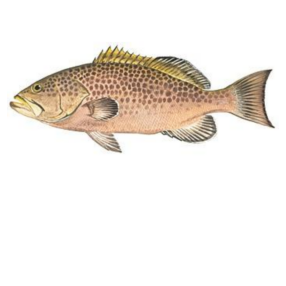

In [5]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [6]:
images.shape

torch.Size([100, 3, 224, 224])

In [7]:
model(images)

tensor([[ 1.6420, -1.6165,  3.9441,  ...,  1.5528,  0.9305,  0.8060],
        [ 7.0829,  4.8920,  4.8881,  ...,  3.9291,  1.2805,  0.8664],
        [ 9.4950,  3.0790,  4.0926,  ...,  1.5742,  1.5977, -0.0159],
        ...,
        [-0.0839, -1.0094,  1.2867,  ..., -3.8216, -0.5095,  3.9504],
        [ 0.4171,  1.4708, -1.8086,  ...,  4.2890,  3.1664, -0.3316],
        [14.5447,  7.7221,  0.3967,  ...,  3.6840,  5.1193,  0.0756]],
       grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)

In [9]:
y.shape

torch.Size([100, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [11]:
for i in list(guesses):
    print(labels[i])

sea lion
ocarina, sweet potato
barracouta, snoek
matchstick
banded gecko
sleeping bag
paper towel
isopod
armadillo
letter opener, paper knife, paperknife
desk
dogsled, dog sled, dog sleigh
tiger shark, Galeocerdo cuvieri
airship, dirigible
street sign
hair slide
dugong, Dugong dugon
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
African grey, African gray, Psittacus erithacus
warplane, military plane
swimming trunks, bathing trunks
barrow, garden cart, lawn cart, wheelbarrow
warplane, military plane
can opener, tin opener
sturgeon
hammerhead, hammerhead shark
plastic bag
wool, woolen, woollen
monitor
ski
flagpole, flagstaff
Gila monster, Heloderma suspectum
scabbard
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
hook, claw
leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea
tench, Tinca tinca
pineapple, ananas
monitor
letter opener, paper knife, paperknife
barracouta, snoek
airliner
water bottle
swimm

In [12]:
Y = np.zeros(50,)
Y[25:] = 1

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() 

In [15]:
X.shape

(100, 1000)

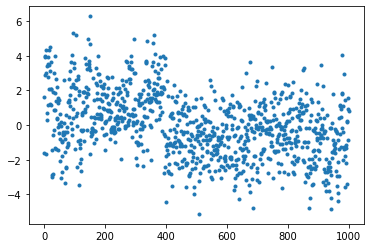

In [16]:
plt.plot(X[0],'.') #this shows a plot graph for all the numbers used in the array, the numbers are generated on a plt graph. You also can change the plot shape and color by writing in the code.

In [17]:
X[0]

array([ 1.64196026e+00, -1.61647558e+00,  3.94413567e+00,  4.02075005e+00,
        2.87645364e+00,  4.34875631e+00,  3.03584504e+00, -1.64617634e+00,
        2.94859827e-01,  3.42264676e+00,  7.09731519e-01,  1.17644286e+00,
        2.79537106e+00,  3.93529654e+00,  3.53342581e+00,  2.11346173e+00,
        3.46343875e+00,  4.35567617e+00,  3.14727283e+00,  4.52241993e+00,
        1.21019435e+00,  3.65718484e+00,  1.17515910e+00,  2.06376362e+00,
        2.09039044e+00, -3.02564549e+00, -1.46012831e+00, -2.90612054e+00,
       -2.85394526e+00,  1.89344037e+00, -6.00939691e-01,  8.78205180e-01,
       -2.88831472e-01,  2.99376941e+00,  3.99691916e+00,  8.53811502e-01,
        1.84348989e+00, -1.31013238e+00, -1.38445139e+00,  2.67123055e+00,
        1.37200153e+00,  3.83978307e-01,  3.72071266e-01,  2.21790481e+00,
        1.29434013e+00, -1.42623389e+00,  1.53996336e+00, -9.39724669e-02,
        5.81565350e-02, -4.85018313e-01,  1.44197512e+00,  6.66768610e-01,
       -8.01214874e-01, -

In [18]:
np.argmax(X[0])

150

In [19]:
labels[948]

'Granny Smith'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [21]:
for i in top_ten:
    print(labels[i])

sea lion
hummingbird
otter
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
pelican
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus
beaver
mink
dugong, Dugong dugon
chickadee


In [22]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  9.,  46., 134., 195., 250., 182., 112.,  53.,  15.,   4.]),
 array([-5.1337557 , -3.991254  , -2.8487525 , -1.7062508 , -0.56374913,
         0.5787525 ,  1.7212541 ,  2.8637557 ,  4.0062575 ,  5.148759  ,
         6.2912607 ], dtype=float32),
 <a list of 10 Patch objects>)

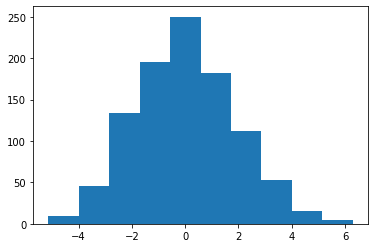

In [23]:
plt.hist(X[0]) #this shows a histogram plot. this plt is showing the data previously gathered as a simple histogram plot.

In [26]:
X = GPU_data(X)
Y = GPU_data(Y)

RuntimeError: ignored

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


https://tensorspace.org/